In [131]:

# import necessary packages to view data in interpreter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import defaultdict
# import data from csv file into pandas dataframe
filename = 'Used car sale price estimation.csv'
df_origin = pd.read_csv(filename).set_index('index').drop(columns=['Unnamed: 0'])

In [76]:
# Inspect each column to understand what data types are present and how to evaluate their characteristics
df_origin.head()

,name,location,year,millage,fuel_type,gears,owners,mpg,engine_size,power,seats,new_price,sale_price,wear_factor
index,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,0.100526
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,0.053106
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,0.010865
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,0.062312
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,0.056804


In [78]:
# next we need to evaluate the distribution of each columns' values. 
# This shall be accomplished differently for categorical vs numerical columns
# obvious categorical columns are name, location, fuel type, gears
# obvious numerical columns are millage, mpg, engine size, power, new price, wear_factor
# year, owners and seats could be evaluated as either numerical or categorical because they are discrete. Lets first treat them as categorical just to understand the distributions of their values.
# first lets just see the percentage of null values in each column. We can handle the nulls differently based on how significant they are and the data type of the column
# These results will come in handy later 
100*df_origin.isna().sum()/len(df_origin)


name            0.000000
location        0.000000
year            0.000000
millage         0.000000
fuel_type       0.000000
gears           1.196212
owners          0.000000
mpg             0.564878
engine_size     0.598106
power           0.598106
seats           0.697790
new_price      86.310018
sale_price      0.000000
wear_factor     0.000000
dtype: float64

In [79]:
# for categorical columns we inspect how many of each value are present in each column
categorical = ['name','location','year','fuel_type','gears','owners','seats']
dict_cat_stats = defaultdict(dict)
dict_metric = ['value counts','number of unique values']
for c in categorical:
    stats = df_origin.groupby([c],dropna=False)['sale_price'].describe()
    dict_cat_stats[c]['value counts'] = stats
    unique_val_len = len(df_origin[c].unique())
    dict_cat_stats[c]['number of unique values'] = unique_val_len
    print(c+': '+str(unique_val_len))



name: 1876
location: 11
year: 23
fuel_type: 6
gears: 3
owners: 4
seats: 10


C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\3609821498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\3609821498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\3609821498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\3609821498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\3609821498.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation =

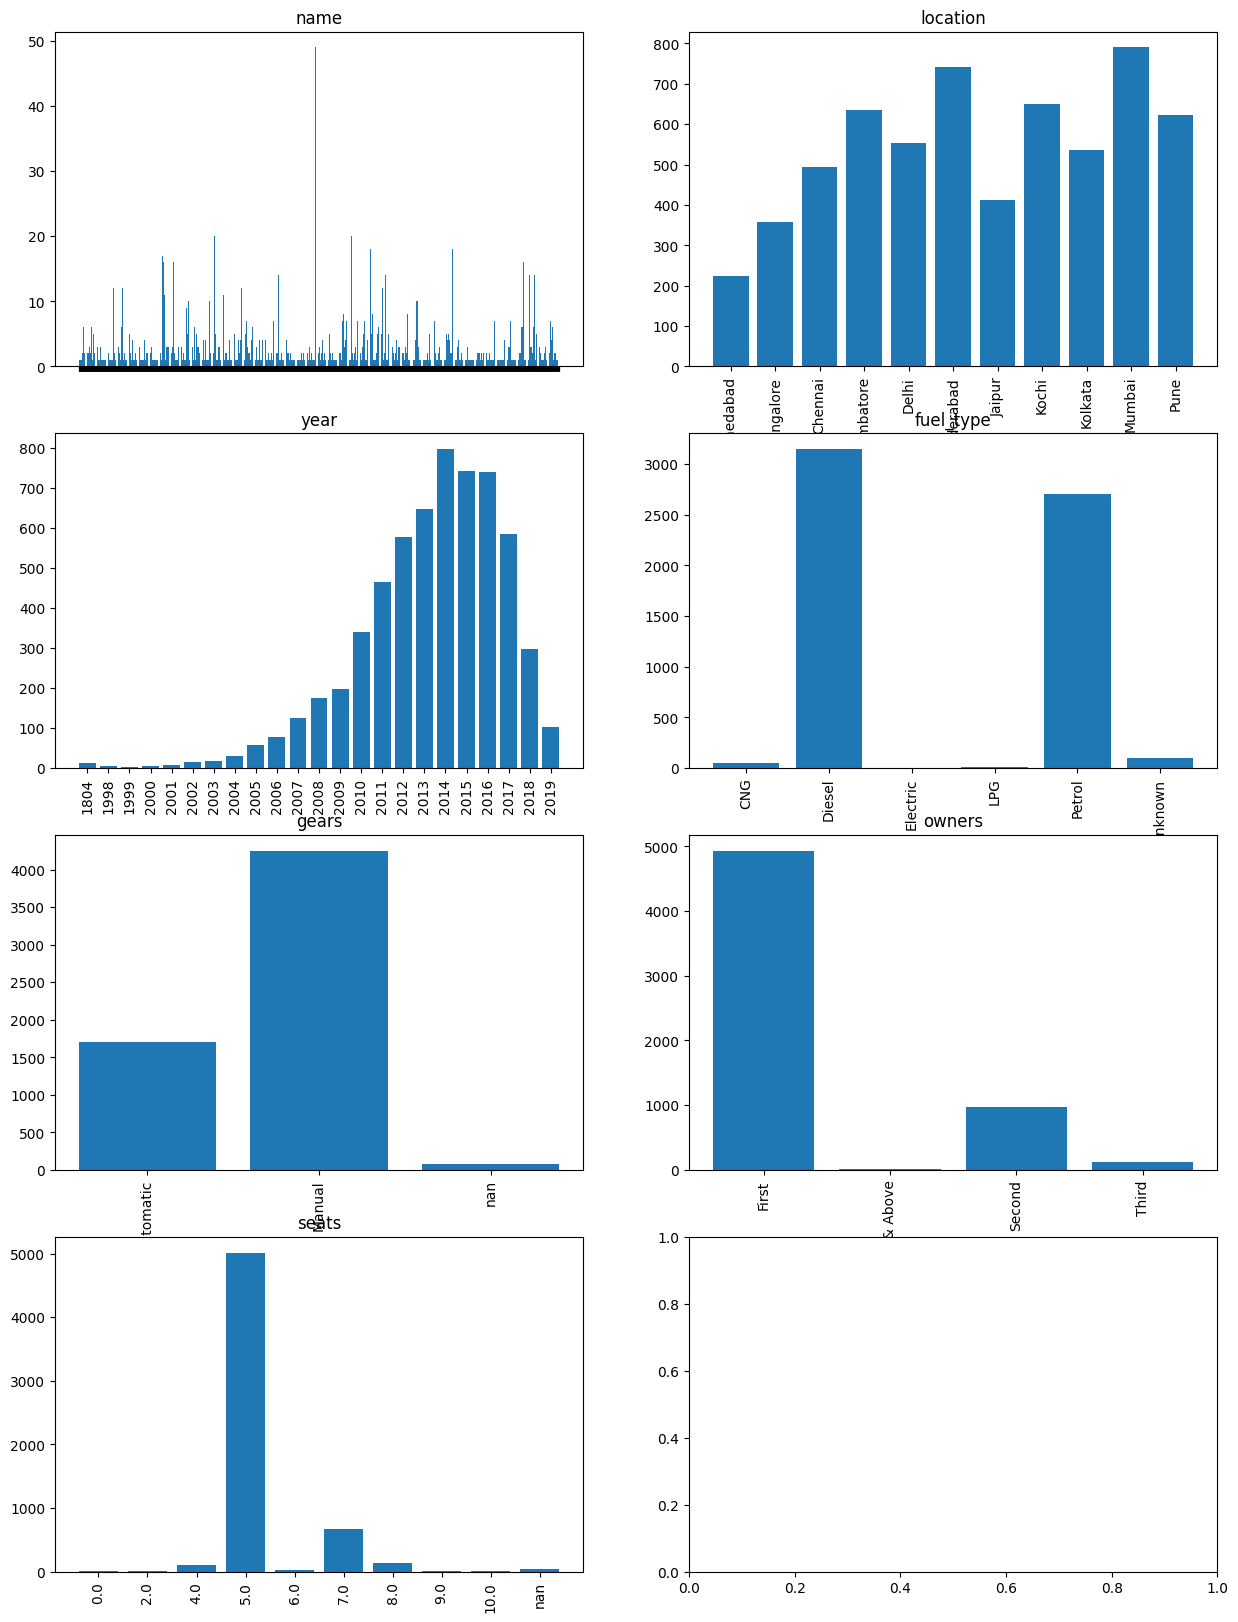

In [86]:
# lets visualize the distributions of these features
# we will do this slightly differently for name because there are so many unique values
n_cols = 2
n_rows = int(np.ceil(len(categorical)/n_cols))
fig,ax =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(15,20))
axs = ax.flatten()
for c,ax in zip(categorical,axs):
    c_val_counts = dict_cat_stats[c]['value counts']
    ax.bar(c_val_counts.index.astype(str),c_val_counts['count'].values)
    if c != 'name':
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    else:
        ax.set_xticklabels([])   # or their labels
    ax.set_title(c)


In [ ]:
# these bar charts are to gain an understanding of how our data is distributed in a visual form
# we can easily see which values have a lot of data points and which ones do not
# this may be able to help explain high and low levels of mode accuracy for different feature values
# some other key observations:
    # 1. data discrepancy in the year variable. Value 1804 is impossible considering there were no cars built then
    #    - we will remove these records form the data set
    # 2. The number of Nan values for the gears and seats variable also make up a very small amount of the data
    #    - we will remove these records form the data set
    # 3. some values for fuel types, owners, seats, gears and year that occur very few times
    #    - One way to account for this is to use kfold  cross validation to ensure that some models are training on this data
    #    - another method would be to impute more data for these categories
    #    - before imputing any data we should see which of these variables are correlated to the sale price
    #    - if they are not then they will not be useful to the sale price estimates and we can remove them
# dropped null data points:
    # are the non null columns for these dropped data points represented in the rest of the data 

<AxesSubplot: >

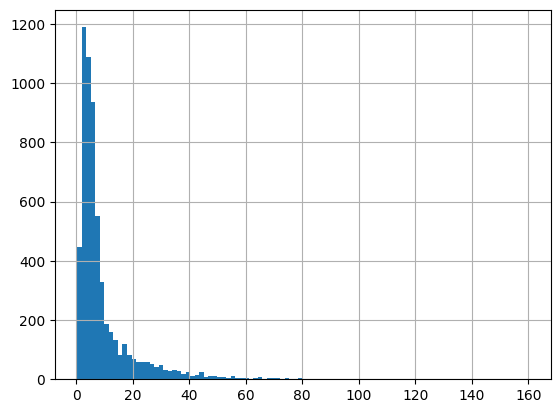

In [66]:
# first lets take a look at the distribution of our target variable
target = 'sale_price'
df_origin[target].hist(bins=100)

Text(0.5, 0.98, '')

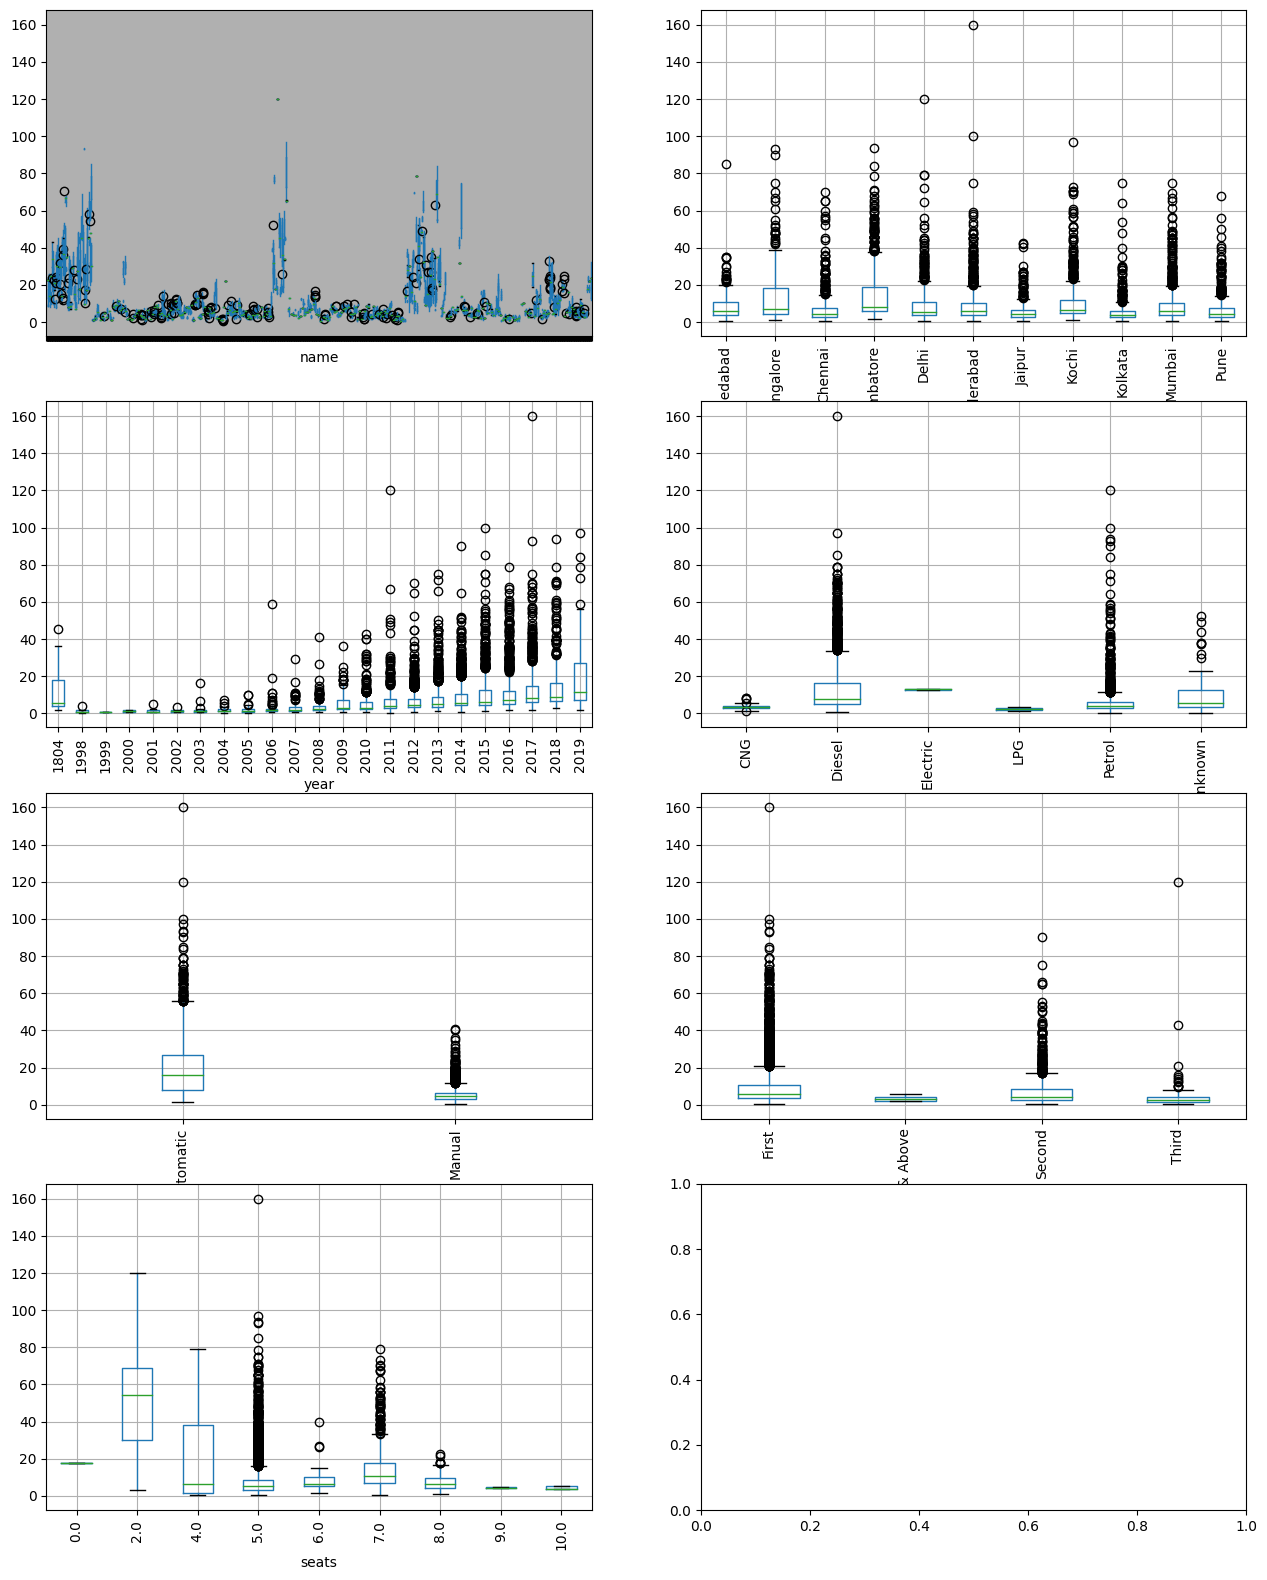

In [100]:
# before we saw that there were no Nan's in the target variable so the above histogram makes up all of our data
# Notice that the distrution has a peak at lower prices so when assessing the accuracy of the model we should take into account that there is less data at the higher sale prices
# we should split our data into training and testing sets based on this distribution to ensure we are training on values across the distribution
# now lets see how sales price differs between variable values
n_cols = 2
n_rows = int(np.ceil(len(categorical)/n_cols))
fig,axes =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(15,20))
for i,el in enumerate(categorical):
    a = df_origin.boxplot(target, by=el, ax=axes.flatten()[i],rot=90)
    if el == 'name':
        a.set_xticklabels('')
    a.set_title('')
fig.suptitle('')


In [ ]:
# Some obvious insights
# name makes a big impact on sale price. 
#   - Since there are nearly 2000 different models and some have very few data points we may have to try a few methods for using this variable
#   - one hot encoding all of those values could overfit the model
#   - two other options
#       - impute data for models with few data points
#       - extract the make from the title of the car model and use only that
# Location does not appear to make a big impact
# There is a clear positive correlation between year and sale price. The more recent the sale the higher the amount
#   - because of this apparent steady trend we will treat the year as a numerical variable
# Petrol and Deisel may tend to sell for more but this is only seen in the outliers so the significance of this is not confirmed
# automatic cars appear to sell for slightly more than manual
# number of owners seems to be negatively correlated to sale price. The more owners the lower the sale price
#   - this is not abundantly clear so we could try treating this variable as both categorical (one-hot encoding) and numerical
# Cars with two seats tend to sell for more but there is no clear correlation here to sale price
#   - we will treat this variable as categorical
categorical = ['name','location','fuel_type','gears','seats']

31


<AxesSubplot: title={'center': 'sale_price'}, xlabel='make'>

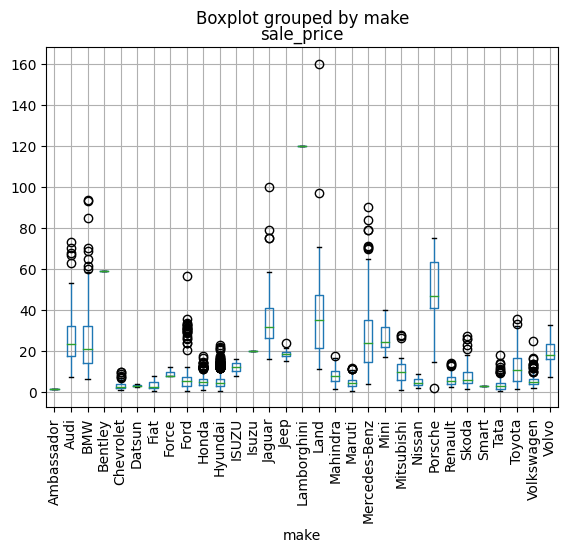

In [226]:
# lets see what happens if we feature engineer the name variable by exrtracting the car make and use that instead of the whole name
df_origin['make'] = df_origin['name'].str.split(' ').str[0]
print(len(df_origin['make'].unique()))
df_origin['make'].value_counts(dropna=False)
df_origin.boxplot(target, by='make',rot=90)



In [ ]:
# this definitely seems like a viable option
# identifying the car make based on the first space in the name variable return 31 different makes
# the boxplot shows clear differences in the sale price of different car makes
# this also makes logical sense
#   - Generally, car costs are highly dependent on make and even though we may be losing some granularity here, we have less of a chance of overfitting
#   - we could try both, the full name and just the make.

In [212]:
# data prep
numerical = ['year','millage','owners','mpg','engine_size','power','new_price','wear_factor','sale_price']
df_fixed = df_origin.dropna(axis=0,subset=df_origin.columns[df_origin.columns!='new_price'])
df_fixed = df_fixed[~df_fixed['power'].str.contains('null')]
print((len(df_origin) - len(df_fixed))/len(df_origin))
year_filter = (df_fixed['year']!=1804)
owners_dict = {'First':1,'Second':2,'Third':3,'Fourth & Above':4}
df_fixed = df_fixed[year_filter]
df_fixed['year'] = df_fixed['year'].add(-1997) 
df_fixed = df_fixed.replace({'owners':owners_dict})
df_fixed['mpg'] = df_fixed['mpg'].str.split(' ').str[0].astype(float)
df_fixed['engine_size'] = df_fixed['engine_size'].str.split(' ').str[0].astype(int)
df_fixed['power'] = df_fixed['power'].str.split(' ').str[0].astype(float)




0.040870576507725534


In [127]:
# Note we are only dropping ~4% of our data due to null values, which is minimal
# If this were more, imputing missing values using ML or randomly sampling from distributions may appropriate to recover some of this data

In [213]:
df_fixed.corr()

C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\675107526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_fixed.corr()


,year,millage,owners,mpg,engine_size,power,seats,sale_price,wear_factor
year,1.000000,-0.168281,-0.383677,0.284772,-0.068542,0.012418,0.011276,0.298707,-0.083167
millage,-0.168281,1.000000,0.080349,-0.058896,0.092072,0.033098,0.081477,-0.007866,0.427004
owners,-0.383677,0.080349,1.000000,-0.146315,0.060993,0.028205,0.009117,-0.089164,0.044116
mpg,0.284772,-0.058896,-0.146315,1.000000,-0.636420,-0.538419,-0.328293,-0.340940,-0.036257
engine_size,-0.068542,0.092072,0.060993,-0.636420,1.000000,0.866353,0.397889,0.656858,0.042321
power,0.012418,0.033098,0.028205,-0.538419,0.866353,1.000000,0.098740,0.771424,0.013584
seats,0.011276,0.081477,0.009117,-0.328293,0.397889,0.098740,1.000000,0.053758,0.032024
sale_price,0.298707,-0.007866,-0.089164,-0.340940,0.656858,0.771424,0.053758,1.000000,0.000378
wear_factor,-0.083167,0.427004,0.044116,-0.036257,0.042321,0.013584,0.032024,0.000378,1.000000


In [214]:
# this correlation matrix shows which variables are correlated to each other
# here we can see which variables have significant correlations to the sale price
#   - In order starting from most significant: power, engine size, mpg (negative), owners (negative), year, seats
df_prices = df_fixed[['new_price','sale_price']]
df_prices['new_price'] = df_prices['new_price'].str.split(' ').str[0].astype(float)
df_prices.dropna(inplace=True)
print((len(df_fixed) - len(df_prices))/len(df_fixed))
df_prices[['new_price','sale_price']].corr()

0.8599444637278723


C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\3815029238.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices['new_price'] = df_prices['new_price'].str.split(' ').str[0].astype(float)
C:\Users\jts54\AppData\Local\Temp\ipykernel_36312\3815029238.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prices.dropna(inplace=True)


,new_price,sale_price
new_price,1.00000,0.68922
sale_price,0.68922,1.00000


In [215]:
# The new price variable appears to be highly correlated to the sale price but we loose 85% of the data due to null values
# first we will build a model without this column
# other option would be to impute data using the other variable columns (not counting sale_price) as an input to a regression model

df_fixed.drop(columns=['new_price'],inplace=True)
numerical.remove('new_price')

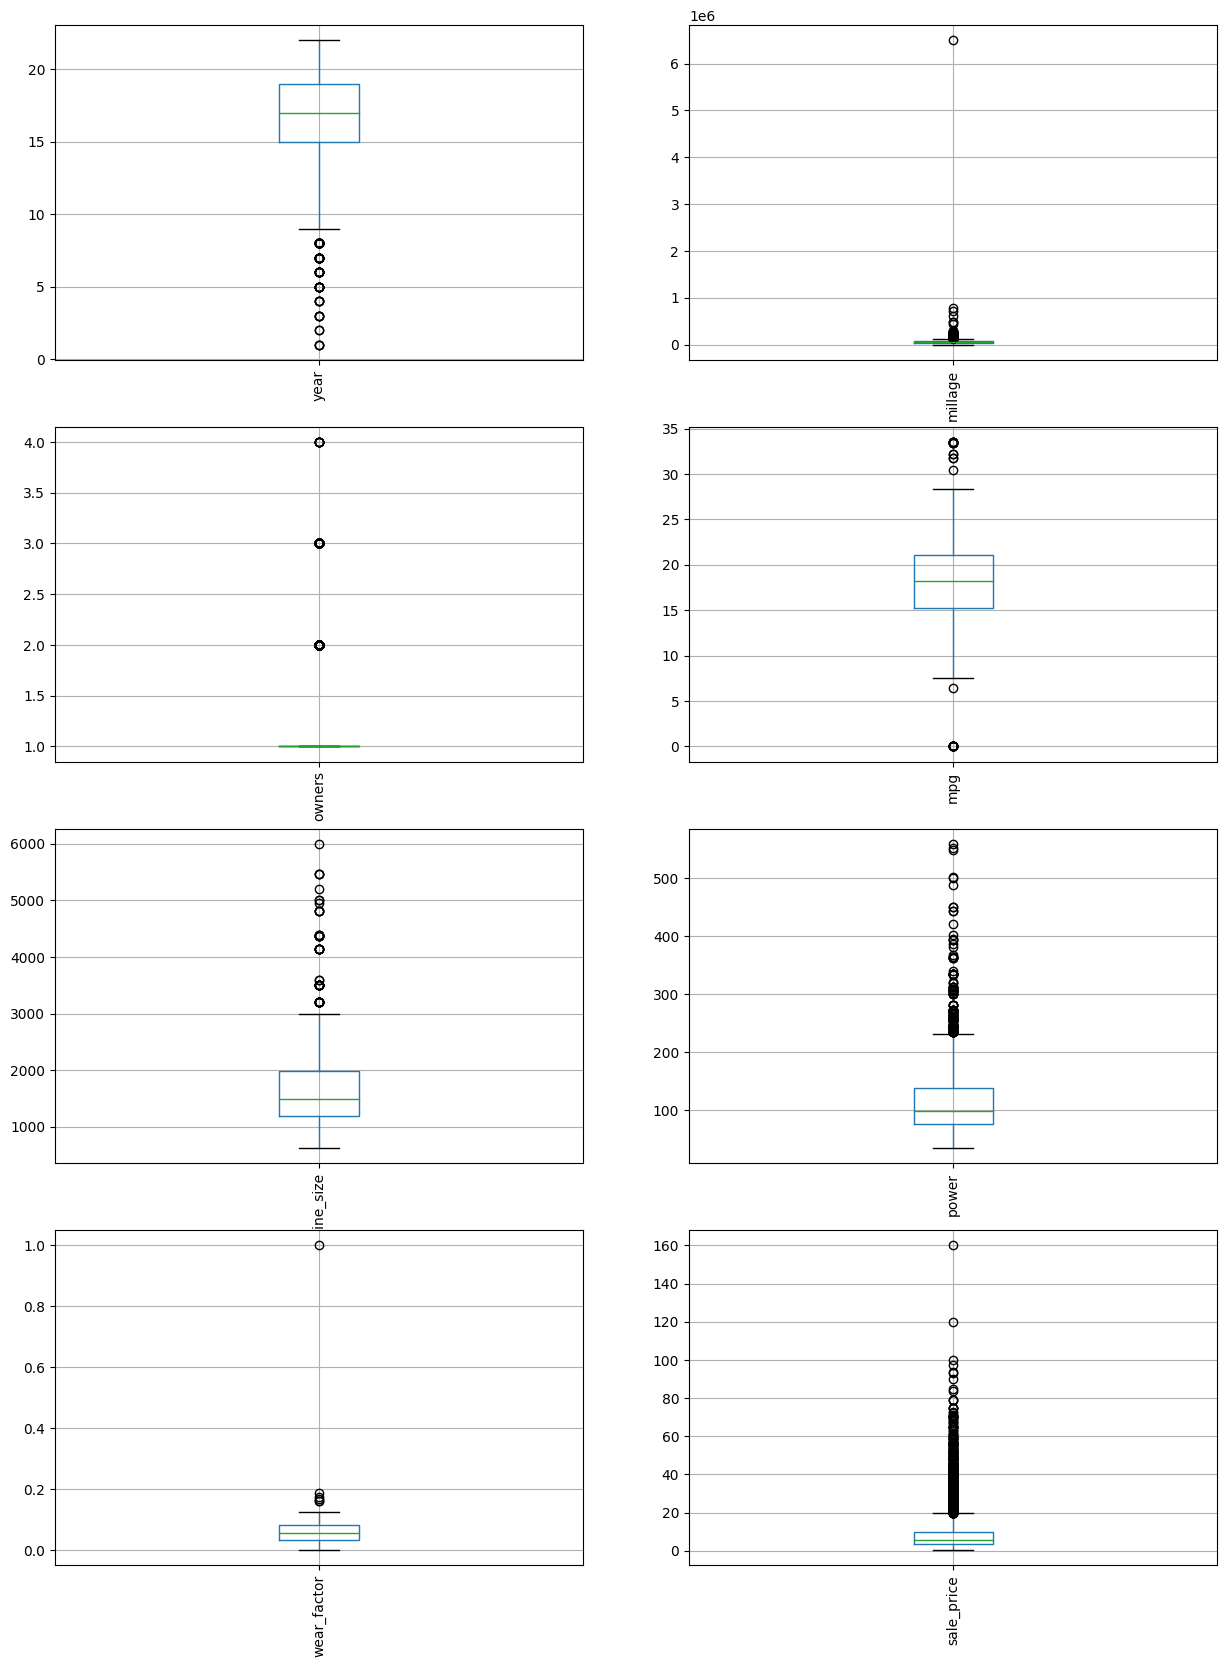

In [216]:
# lets visualize the distributions of these features
# we will do this slightly differently for name because there are so many unique values
df_num = df_fixed[numerical]
n_cols = 2
n_rows = int(np.ceil(len(numerical)/n_cols))
fig,axes =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(15,20))
for i,el in enumerate(numerical):
    df_fixed.boxplot(el, ax=axes.flatten()[i],rot=90)

In [194]:
# the above boxplots show that outliers are present in out data
# these outliers may be real data points but will scew our ability to understand how/if each variable correlates to sale price
# therefore we will remove them for now 

0.0598750433877126
       year  millage  owners    mpg  engine_size   power  wear_factor  \
index                                                                   
0        13    72000       1  26.60          998   58.16     0.100526   
1        18    41000       1  19.67         1582  126.20     0.053106   
2        14    46000       1  18.20         1199   88.70     0.010865   
3        15    87000       1  20.77         1248   88.76     0.062312   
4        16    40670       2  15.20         1968  140.80     0.056804   
...     ...      ...     ...    ...          ...     ...          ...   
6014     17    27365       1  28.40         1248   74.00     0.022590   
6015     18   100000       1  24.40         1120   71.00     0.042330   
6016     15    55000       2  14.00         2498  112.00     0.036612   
6017     16    46000       1  18.90          998   67.10     0.016951   
6018     14    47000       1  25.44          936   57.60     0.069907   

       sale_price  
index      

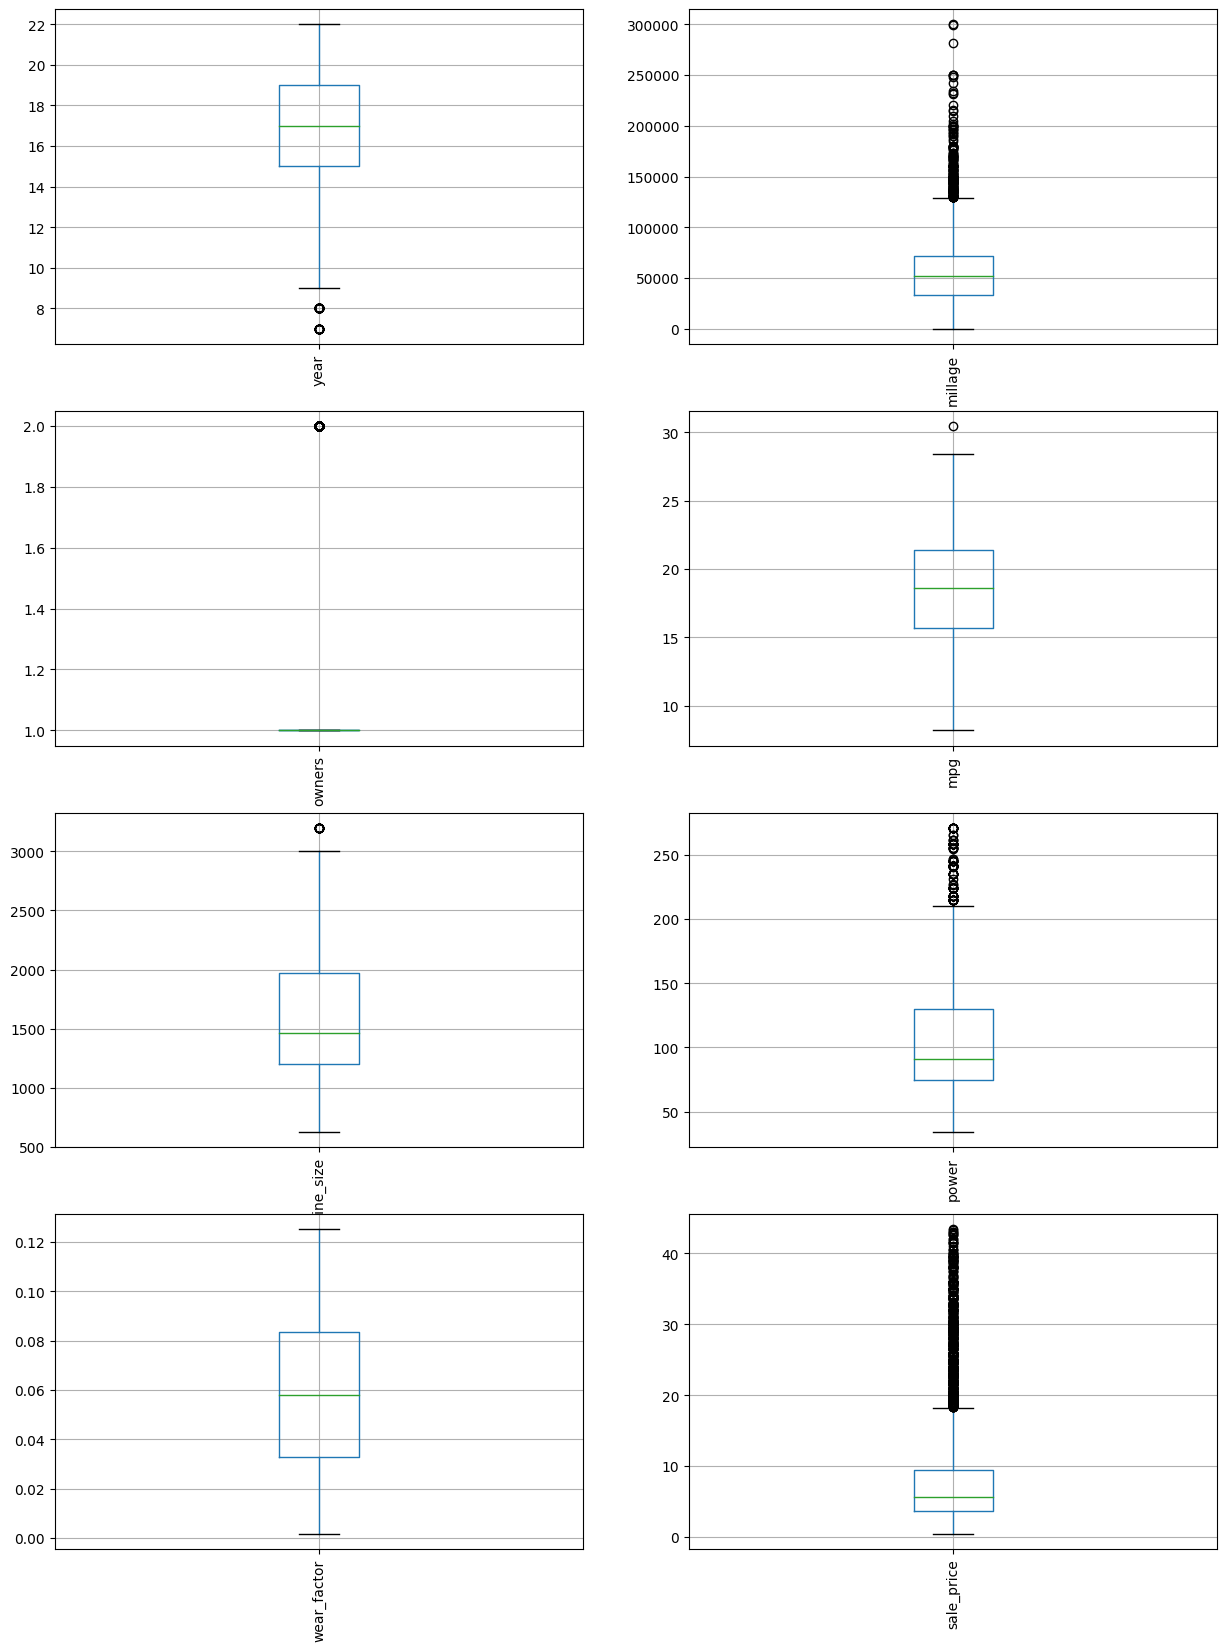

In [228]:
df_num_filt = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]
print((len(df_num) - len(df_num_filt))/len(df_num))
fig,axes =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(15,20))
for i,el in enumerate(numerical):
    df_num_filt.boxplot(el, ax=axes.flatten()[i],rot=90)

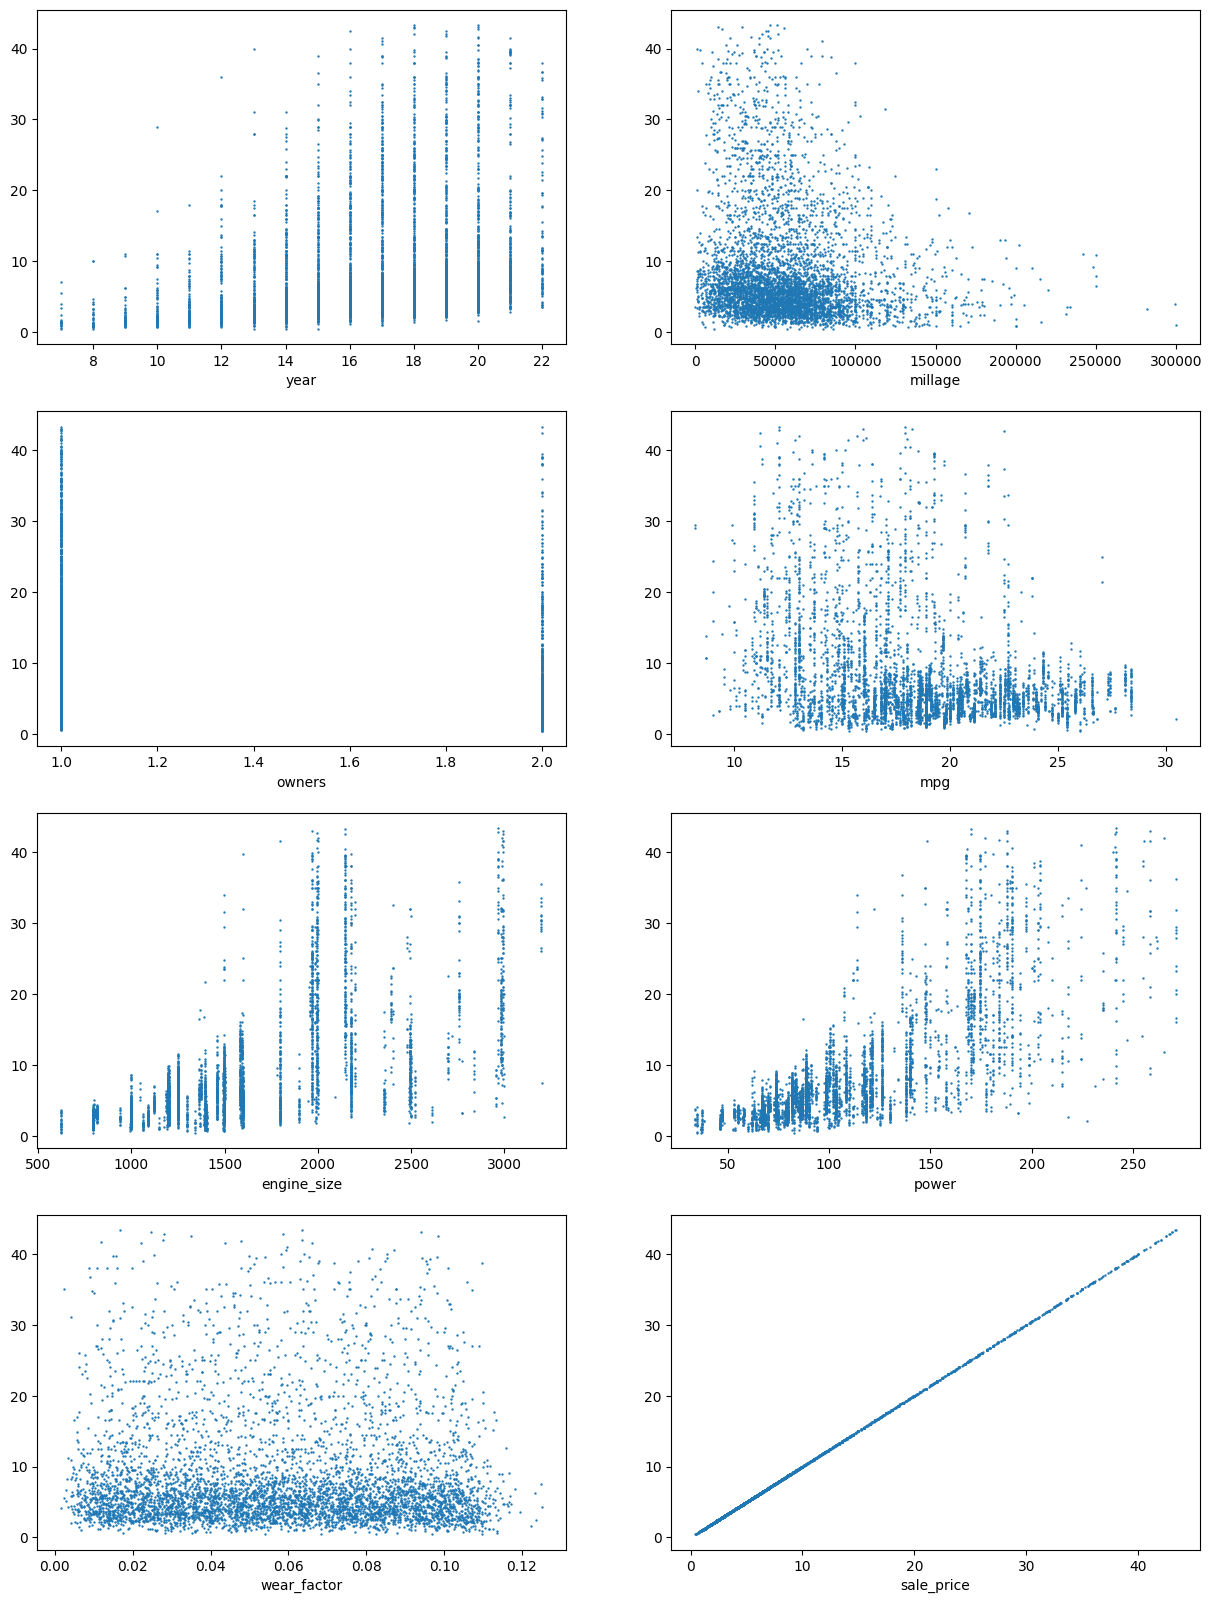

In [221]:
# now that we have removed outliers we can view the correlations to sale price
fig,ax =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(15,20))
axs = ax.flatten()
for c,ax in zip(numerical,axs):
    ax.scatter(df_num_filt[c],df_num_filt['sale_price'],s=0.5)
    ax.set_xlabel(c)

In [222]:
# these visualizations show a lot of scatter but also correlations to the variable we identified from the correlation matrix
# lets make another correlation matrix with the outliers removed
df_num_filt.corr()

,year,millage,owners,mpg,engine_size,power,wear_factor,sale_price
year,1.000000,-0.491940,-0.315000,0.302821,-0.100008,-0.026827,-0.090465,0.316698
millage,-0.491940,1.000000,0.200484,-0.169197,0.250864,0.073618,0.165280,-0.139758
owners,-0.315000,0.200484,1.000000,-0.130298,0.062894,0.046519,0.040220,-0.079063
mpg,0.302821,-0.169197,-0.130298,1.000000,-0.646607,-0.555088,-0.040718,-0.323846
engine_size,-0.100008,0.250864,0.062894,-0.646607,1.000000,0.836451,0.040037,0.632890
power,-0.026827,0.073618,0.046519,-0.555088,0.836451,1.000000,0.006879,0.767552
wear_factor,-0.090465,0.165280,0.040220,-0.040718,0.040037,0.006879,1.000000,-0.021359
sale_price,0.316698,-0.139758,-0.079063,-0.323846,0.632890,0.767552,-0.021359,1.000000


In [ ]:
# variable correlation in order of significance
# power, engine size,mpg,year,millage,owners,wear_factor
# this makes sense with the visuals from the scatter plots
# without these outliers we see a stronger correlations to millage which makes sense because we had a very strong outlier removed
# these inferences are useful to understand what variables should be impacting our model most significantly